In [30]:
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

#### Load grid search overviews

hparams_sets = pd.read_csv('hparams/hparamsets.txt', sep=',', index_col=0)
sets_dict = hparams_sets.to_dict(orient='index')


# Define function to load grid search results
def load_gridsearch_results(set_nr: int) -> dict:
    """Load grid search results for a given hyperparameter set number.
    
    Args:
        set_nr: Hyperparameter set number.
        
    Returns:
        Dictionary containing the last scores of the training for AUC, MRR, NDCG5, NDCG10 grid search results.
    """

    file_str = f'GridEval/EvaluationTranformerIni{set_nr}.pkl'
    with open(file_str, 'rb') as f:
        results = pkl.load(f)[0]
    
    last_metrics = {}
    for metric in ['AUC', 'MRR', 'NDCG5', 'NDCG10']:
        last_metrics[metric] = results[metric][-1]

    return last_metrics

dff_options = {1200: [], 2400: []}
nheads_options = {2: [], 4: [], 8: []}
num_layers_options = {1: [], 2: [], 3: [], 4: [], 5: []}

# Define function to get all grid search results for a specefic hparam
def results_hpram(hparam_name : str ,hparam_options : dict, results_sets : dict, sets_dict: dict, metric : str) -> dict:
    """Get all grid search results for a specefic hparam.
    
    Args:
        hparam_options: Dictionary containing the hparam options.
        reuslts_sets: Dictionary containing the grid search results.
        sets_dict: Dictionary containing the hyperparameter for each set number.
        metric: Metric to get the results for.
        
    Returns:
        Dictionary containing the grid search results for a specefic hparam.
    """
    
    for hparam_value in hparam_options.keys():
        for set_nr in results_sets.keys():
            if sets_dict[set_nr][hparam_name] == hparam_value:
                hparam_options[hparam_value].append(results_sets[set_nr][metric])

    return hparam_options



In [31]:
reuslts_sets = {}
for set_nr in range(1,15):
    reuslts_sets[set_nr] = load_gridsearch_results(set_nr)


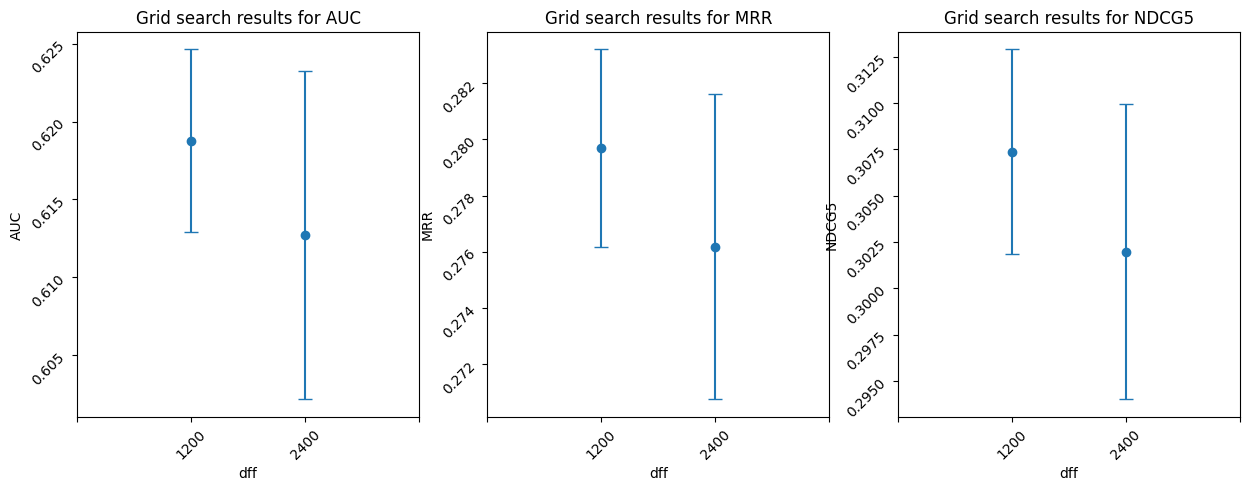

In [42]:
# Display grid search results for dff

metrics = ['AUC', 'MRR', 'NDCG5']

fig, ax = plt.subplots(1,len(metrics),figsize=(15,5))

for idx, metric in enumerate(metrics):
    dff_options = {1200: [], 2400: []}
    # Get results for metric
    dff = results_hpram('dff', dff_options, reuslts_sets, sets_dict, metric)

    # Compute mean and std for each dff
    dff_mean = {}
    dff_std = {}
    for dff_value in dff.keys():
        dff_mean[dff_value] = np.mean(dff[dff_value])
        dff_std[dff_value] = np.std(dff[dff_value])

    # Compute confidence interval for each dff
    dff_ci = {}
    for dff_value in dff.keys():
        dff_ci[dff_value] = 1.96 * dff_std[dff_value] / np.sqrt(len(dff[dff_value]))

    # Plot
    ax[idx].errorbar([1,2], dff_mean.values(), yerr=list(dff_ci.values()), fmt='o', capsize=5)
    ax[idx].set_xlabel('dff')
    ax[idx].set_ylabel(metric)
    ax[idx].set_title(f'Grid search results for {metric}')

    # Change x labels
    ax[idx].set_xticks([0,1,2,3])
    ax[idx].set_xticklabels(['','1200', '2400',''])

    # Angle x axis labels
    for tick in ax[idx].get_xticklabels():
        tick.set_rotation(45)

    # angle y axis labels
    for tick in ax[idx].get_yticklabels():
        tick.set_rotation(45)

plt.show()


/Users/magnusharder/Documents/UNI-DTU/6. Semester/Bachelor Projekt/News-Recommendations/.venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/magnusharder/Documents/UNI-DTU/6. Semester/Bachelor Projekt/News-Recommendations/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/magnusharder/Documents/UNI-DTU/6. Semester/Bachelor Projekt/News-Recommendations/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/magnusharder/Documents/UNI-DTU/6. Semester/Bachelor Projekt/News-Recommendations/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrm

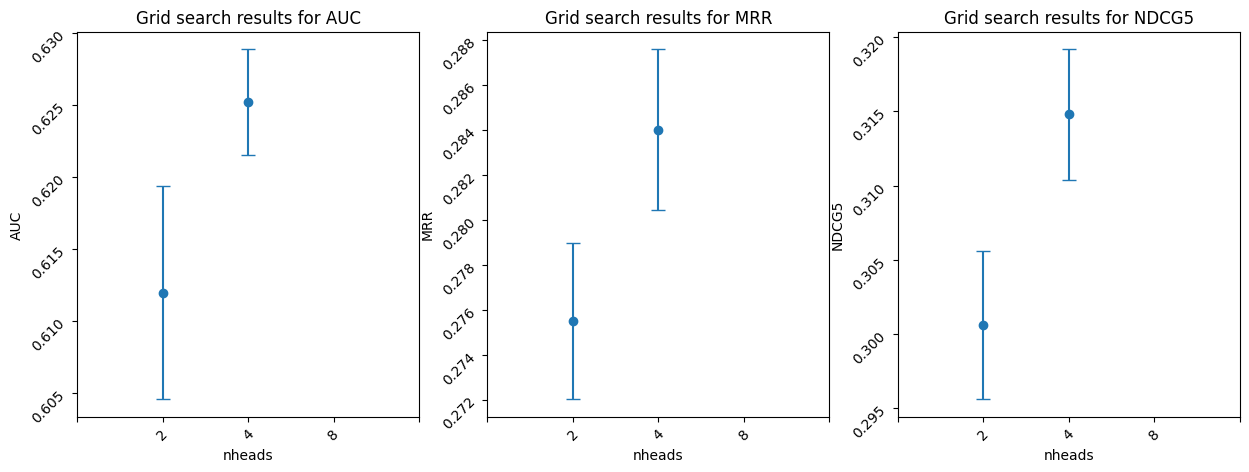

In [43]:
# Display grid search results for nheads

metrics = ['AUC', 'MRR', 'NDCG5']

fig, ax = plt.subplots(1,len(metrics),figsize=(15,5))

for idx, metric in enumerate(metrics):
    
    nheads_options = {2: [], 4: [], 8: []}
    # Get results for metric
    nheads = results_hpram('nheads', nheads_options, reuslts_sets, sets_dict, metric)

    # Compute mean and std for each nheads
    nheads_mean = {}
    nheads_std = {}
    for nheads_value in nheads.keys():
        nheads_mean[nheads_value] = np.mean(nheads[nheads_value])
        nheads_std[nheads_value] = np.std(nheads[nheads_value])

    # Compute confidence interval for each nheads
    nheads_ci = {}
    for nheads_value in nheads.keys():
        nheads_ci[nheads_value] = 1.96 * nheads_std[nheads_value] / np.sqrt(len(nheads[nheads_value]))

    # Plot
    ax[idx].errorbar([1,2,3], nheads_mean.values(), yerr=list(nheads_ci.values()), fmt='o', capsize=5)
    ax[idx].set_xlabel('nheads')
    ax[idx].set_ylabel(metric)
    ax[idx].set_title(f'Grid search results for {metric}')

    # Change x labels
    ax[idx].set_xticks([0,1,2,3,4])
    ax[idx].set_xticklabels(['','2', '4','8',''])

    # Angle x axis labels
    for tick in ax[idx].get_xticklabels():
        tick.set_rotation(45)

    # angle y axis labels
    for tick in ax[idx].get_yticklabels():
        tick.set_rotation(45)
    

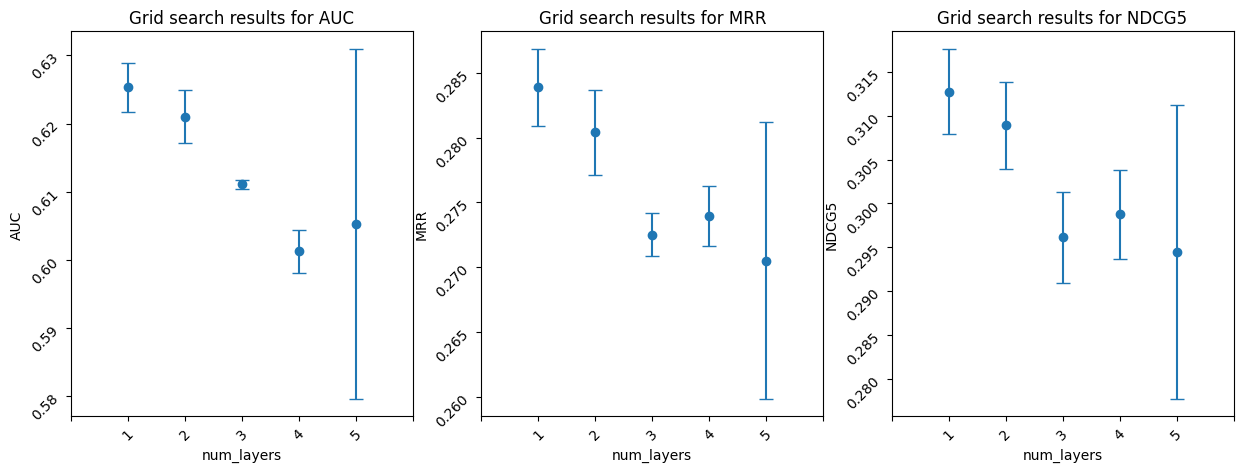

In [45]:
# Display grid search results for num_layers

metrics = ['AUC', 'MRR', 'NDCG5']

fig, ax = plt.subplots(1,len(metrics),figsize=(15,5))

for idx, metric in enumerate(metrics):

    num_layers_options = {1: [], 2: [], 3: [], 4: [], 5: []}
    # Get results for metric
    num_layers = results_hpram('num_layers', num_layers_options, reuslts_sets, sets_dict, metric)

    # Compute mean and std for each num_layers
    num_layers_mean = {}
    num_layers_std = {}
    for num_layers_value in num_layers.keys():
        num_layers_mean[num_layers_value] = np.mean(num_layers[num_layers_value])
        num_layers_std[num_layers_value] = np.std(num_layers[num_layers_value])

    # Compute confidence interval for each num_layers
    num_layers_ci = {}
    for num_layers_value in num_layers.keys():
        num_layers_ci[num_layers_value] = 1.96 * num_layers_std[num_layers_value] / np.sqrt(len(num_layers[num_layers_value]))

    # Plot
    ax[idx].errorbar([1,2,3,4,5], num_layers_mean.values(), yerr=list(num_layers_ci.values()), fmt='o', capsize=5)
    ax[idx].set_xlabel('num_layers')
    ax[idx].set_ylabel(metric)
    ax[idx].set_title(f'Grid search results for {metric}')

    # Change x labels
    ax[idx].set_xticks([0,1,2,3,4,5,6])
    ax[idx].set_xticklabels(['','1', '2','3','4','5',''])

    # Angle x axis labels
    for tick in ax[idx].get_xticklabels():
        tick.set_rotation(45)

    # angle y axis labels
    for tick in ax[idx].get_yticklabels():
        tick.set_rotation(45)

plt.show()


In [11]:
reuslts_sets

{1: {'AUC': 0.6198, 'MRR': 0.2833, 'NDCG5': 0.3109, 'NDCG10': 0.3729},
 2: {'AUC': 0.6268, 'MRR': 0.28, 'NDCG5': 0.3057, 'NDCG10': 0.3718},
 3: {'AUC': 0.6223, 'MRR': 0.2812, 'NDCG5': 0.3061, 'NDCG10': 0.3718},
 4: {'AUC': 0.6157, 'MRR': 0.2766, 'NDCG5': 0.3047, 'NDCG10': 0.3701},
 5: {'AUC': 0.6106, 'MRR': 0.2737, 'NDCG5': 0.2999, 'NDCG10': 0.3632},
 6: {'AUC': 0.6115, 'MRR': 0.2713, 'NDCG5': 0.2924, 'NDCG10': 0.3597},
 7: {'AUC': 0.6035, 'MRR': 0.2723, 'NDCG5': 0.2951, 'NDCG10': 0.3605},
 8: {'AUC': 0.5989, 'MRR': 0.2756, 'NDCG5': 0.3024, 'NDCG10': 0.3643},
 9: {'AUC': 0.6238, 'MRR': 0.2782, 'NDCG5': 0.3066, 'NDCG10': 0.37},
 10: {'AUC': 0.5867, 'MRR': 0.2628, 'NDCG5': 0.2824, 'NDCG10': 0.3462},
 11: {'AUC': 0.6248, 'MRR': 0.2837, 'NDCG5': 0.3155, 'NDCG10': 0.3783},
 12: {'AUC': 0.6299, 'MRR': 0.2885, 'NDCG5': 0.3189, 'NDCG10': 0.3804},
 13: {'AUC': 0.6266, 'MRR': 0.2854, 'NDCG5': 0.3175, 'NDCG10': 0.3787},
 14: {'AUC': 0.6195, 'MRR': 0.2784, 'NDCG5': 0.3073, 'NDCG10': 0.3707}}

In [49]:
sets_dict[11]

{'nheads': 4, 'num_layers': 1, 'dff': 1200}